In [1]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
embeddings_dict = {}

In [3]:
embeddings_dict = {}
with open("glove.6B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [4]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [5]:
find_closest_embeddings(embeddings_dict["king"])

['king',
 'prince',
 'queen',
 'uncle',
 'ii',
 'grandson',
 'brother',
 'kingdom',
 'son',
 'nephew',
 'elder',
 'iv',
 'ruler',
 'cousin',
 'name',
 'monarch',
 'father',
 'grandfather',
 'reign',
 'throne',
 'iii',
 'lord',
 'henry',
 'mentioned',
 'vi',
 'edward',
 'succeeded',
 'crown',
 'homage',
 'emperor',
 'sons',
 'latter',
 'philip',
 'eldest',
 'later',
 'patron',
 'viii',
 'coronation',
 'heir',
 'brother-in-law',
 'vii',
 'frederick',
 'majesty',
 'charles',
 'mr.',
 'legend',
 'successor',
 'knight',
 'elizabeth',
 'brought',
 'empire',
 'birthplace',
 'as',
 'tribute',
 'hero',
 'assumed',
 'constantine',
 'caesar',
 'george',
 'son-in-law',
 'occasion',
 'napoleon',
 'soon',
 'great',
 'famous',
 'deposed',
 'took',
 'family',
 'once',
 'himself',
 'noble',
 'sir',
 'chose',
 'john',
 '’s',
 'proclaimed',
 'father-in-law',
 'became',
 'imperial',
 'beloved',
 'death',
 'succession',
 'refer',
 'rulers',
 'came',
 'named',
 'footsteps',
 'upon',
 'mr',
 'honour',
 'harr

In [6]:
find_closest_embeddings(embeddings_dict["king"])[:5]

['king', 'prince', 'queen', 'uncle', 'ii']

In [7]:
find_closest_embeddings(embeddings_dict["king"])[1:6]

['prince', 'queen', 'uncle', 'ii', 'grandson']

In [8]:
print(find_closest_embeddings(
    embeddings_dict["twig"] - embeddings_dict["branch"] + embeddings_dict["hand"]
)[:5])

['fingernails', 'toenails', 'stringy', 'peeling', 'shove']


In [9]:
tsne = TSNE(n_components=2, random_state=0)

tokens = list(embeddings_dict.keys())

vectors = [embeddings_dict[token] for token in tokens]
vectors = np.asarray(vectors)
Y = tsne.fit_transform(vectors[:200])


C:\Users\MKOTAN\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\MKOTAN\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


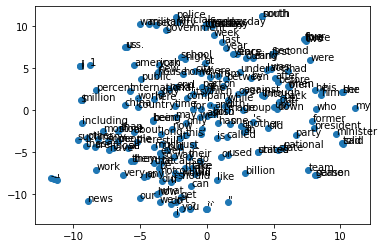

In [10]:
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(tokens, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()